# Introduction

* In this study I will make a prediction of a heart disease presence with KNN. 
* I will compare the result with [LR method](https://www.kaggle.com/albatros1602/heart-disease-prediction-with-lr) which I studied before.
* You may want to check my prior study for [visualisation](https://www.kaggle.com/albatros1602/visualization-for-heart-disease-prediction) of this data.

<font color = 'blue'>
## Content
1. [About the Dataset](#1)
1. [Normalization](#2)
1. [Splitting the Data](#3)
1. [KNN](#4)  
1. [Finding K Value](#5)
1. [Conclusion](#6)

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


<a id = "1"></a><br>
## About the Dataset

This dataset has 14 features, one of which is the target feature. Target feature tells us weather a patient has a hearth disease or not. About the target feature:
* 1 = Patient has heart disease
* 0 = Patient doesn't have heart disease

You can reach the meanings of the other features from [my prior study](https://www.kaggle.com/albatros1602/visualization-for-heart-disease-prediction).

Lets check the data first...

In [26]:
dt = pd.read_csv('../input/heart-disease-uci/heart.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
Y = dt[dt.target == 1]
N = dt[dt.target == 0]

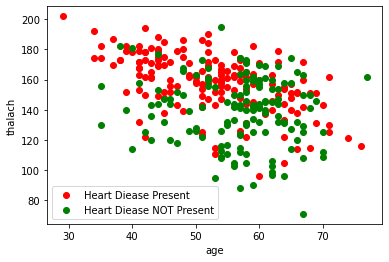

In [29]:
# scatter plot
plt.scatter(Y.age,Y.thalach, color = "red", label = "Heart Diease Present")
plt.scatter(N.age,N.thalach, color = "green", label = "Heart Diease NOT Present")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend()
plt.show()

* There is not a very distinct seperation between green and red dots.
* The KNN method will try to find the nearest "k" number of points to a selected point and will make a prediction according to the value of the nearest points.

<a id = "2"></a><br>
## Normalization

* We need to normalize the data, otherwise one feature may dominate an other feature.

In [30]:
y = dt.target.values
x_dt = dt.drop(["target"], axis = 1)
x = (x_dt - np.min(x_dt))/(np.max(x_dt)-np.min(x_dt))

<a id = "3"></a><br>
## Splitting the Data
* %80 of the data will be used for training the model
* %20 of the data will be used for testing the model
* I chose random_state = 42 in order to obtain the same rows as train and test at each splitting.

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

<a id = "4"></a><br>
## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # I chose K = 3 just for now.
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("{} nn score: {} ".format(3,knn.score(x_test,y_test)))

3 nn score: 0.8360655737704918 


<a id = "5"></a><br>
## Finding K Value
* Above, I chose K = 3. The accuracy of the model is %83.6
* The accuracy of the model will change according to the K value
* Since the aim is to reach the highest accuracy, we need to try different K values and find the best value which gives the highes accuracy.

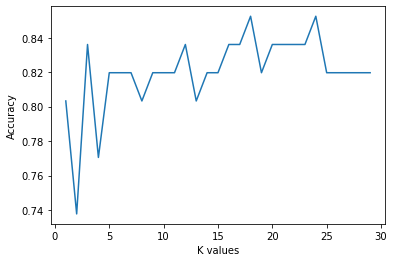

In [33]:
score_list = []
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,30),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

* For K = 18 or K = 24 the model reaches the highest accuracy which is %85.25

<a id = "6"></a><br>
## Conclusion

For this data:
* The accuracy of KNN model is %85.25
* The accuracy of LR model is %83.61
* The accuracy of the models may change according to the data.
* You can reach more ML tutorials at [DATAI Team](https://www.kaggle.com/kanncaa1)'s page.